In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("data/attacks.csv",encoding = "latin1")

In [3]:
data.shape

(25723, 24)

In [4]:
data.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [5]:
data.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
data.info("deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
null_cols = data.isnull().sum()
null_cols[null_cols>0]
#columns with total null values

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

In [8]:
no_case_number = list(data[data["Case Number"].isnull()].index)

In [9]:
len(no_case_number)

17021

In [10]:
no_date_or_case_number = data[(data["Case Number"].isnull()) & (data["Date"].isnull())].index

In [11]:
len(no_date_or_case_number)
#one colum might be useful

17020

In [12]:
data.drop(no_date_or_case_number, axis=0, inplace=True)

In [13]:
data.shape

(8703, 24)

In [14]:
data[data["Case Number"].isnull()]
#it has a lot of data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,NaN,NaN


In [15]:
data.iloc[5486:5490]
#we can deduce the case number from the pdf column as all follow the same structure

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5486,1905.12.29,29-Dec-1905,1905.0,Invalid,AUSTRALIA,Western Australia,Geraldton,Bathing,Hugh Carroll,M,...,Shark involvement not confirmed,"The Advertiser, 12/30/1905",1905.12.29-Carroll.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.12.29,1905.12.29,817.0,NaN,NaN
5487,1905.09.29,29-Sep-1905,1905.0,Unprovoked,AUSTRALIA,New South Wales,"Waverly, Sydney",Swimming,Jame Crotty,M,...,NaN,"The Argus, 9/30/1905",1905.09.29-Crotty.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.29,1905.09.29,816.0,NaN,NaN
5488,NaN,Reported 06-Sep-1905,1905.0,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,M,...,NaN,"Muncie Evening Press, 8/6/1913",1905.09.06.R-Curry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.09.06.R,1905.09.06.R,815.0,NaN,NaN
5489,1905.08.24,24-Aug-1905,1905.0,Invalid,EGYPT,Suez Canal,Port Said,Human head found in shark caught by British st...,NaN,M,...,"Tiger shark, 3.9 m","C. Moore, GSAF",1905.08.24-Head-in-shark.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.08.24,1905.08.24,814.0,NaN,NaN


In [16]:
data.loc[5488,"Case Number"] = "1905.09.06"

In [17]:
data.iloc[5487]
#making sure we have deleted it

Case Number                                                      1905.09.29
Date                                                            29-Sep-1905
Year                                                                 1905.0
Type                                                             Unprovoked
Country                                                           AUSTRALIA
Area                                                        New South Wales
Location                                                    Waverly, Sydney
Activity                                                           Swimming
Name                                                            Jame Crotty
Sex                                                                       M
Age                                                                     NaN
Injury                    FATAL. Shark involvement suspected but not con...
Fatal (Y/N)                                                               Y
Time        

In [18]:
data.isnull().sum()
#case number column is fixed for null values

Case Number                  0
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [19]:
no_date = list(data[data["Date"].isnull()].index)

In [20]:
data[data["Case Number"] == "0"]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8697,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
data.drop_duplicates().shape, data.shape
#a lot of duplicates removed

((6311, 24), (8703, 24))

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data.shape
#we have removed 2392 duplicated rows

(6311, 24)

In [24]:
data[data["Date"].isnull()]
#rows dont look useful

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6302,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6304.0,NaN,NaN
6303,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6305.0,NaN,NaN
6304,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6306.0,NaN,NaN
6305,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6307.0,NaN,NaN
6306,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6308.0,NaN,NaN
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
data.drop(list(data[data["Date"].isnull()].index), axis=0, inplace=True)
#we remove the 9 rows left with nulls in the date column

In [26]:
data.isnull().sum()
#lets fix the two null values in year

Case Number                  0
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [27]:
data[data["Year"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
187,2017.01.08.R,Reported 08-Jan-2017,NaN,Invalid,AUSTRALIA,Queensland,NaN,Spearfishing,Kerry Daniel,M,...,Bull shark,Liquid Vision 1/8/2017,2017.01.08.R-KerryDaniel.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.01.08.R,2017.01.08.R,6116.0,NaN,NaN
6079,1836.08.19.R,Reported 19-Aug-1836,NaN,Unprovoked,ENGLAND,Cumberland,Whitehaven,Swimming,a boy,M,...,NaN,"C. Moore, GSAF",1835.08.19.R-Whitehaven.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.08.19.R,1836.08.19.R,224.0,NaN,NaN


In [28]:
data.loc[187,"Year"] = 2017.0

In [29]:
data.loc[6079,"Year"] = 1835.0

In [30]:
data.isnull().sum()
#lets look at types

Case Number                  0
Date                         0
Year                         0
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [31]:
data[data["Type"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
85,2017.09.15.a,15-Sep-2017,2017.0,NaN,SAMOA,Upolu Island,Nofoalii,Fishing,male,M,...,NaN,"Samoa Observer, 9/16/2017",2017.09.15.a-Samoa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.09.15.a,2017.09.15.a,6218.0,NaN,NaN
382,2015.07.27,27-Jul-2015,2015.0,NaN,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,NaN,NaN
4867,1936.09.11.R,Reported 11-Sep-1936,1936.0,NaN,VIETNAM,NaN,Saigon,Wreck of a sampam,8 crew,M,...,NaN,"Lansing State Journal, 9/11/1936",1936.09.11-Saigon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.09.11.R,1936.09.11.R,1436.0,NaN,NaN
5705,1890.03.03.R,Reported 03-Mar-1890,1890.0,NaN,CEYLON,NaN,NaN,Diving,a pearl diver,M,...,NaN,"The Guardian, 3/3/1890",1890.03.03.R-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.03.03.R,1890.03.03.R,598.0,NaN,NaN


In [32]:
data["Type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: Type, dtype: int64

In [33]:
data[['Type']] = data[['Type']].fillna("Invalid")
#null values to Invalid

In [34]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [35]:
data[data["Investigator or Source"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
119,2017.07.14.a,14-Jul-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,Floreat Beach,Surfing,male,M,...,NaN,NaN,2017.07.14.a-Floreat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.14.a,2017.07.14.a,6184.0,NaN,NaN
290,2016.04.07.b,07-Apr-2016,2016.0,Unprovoked,USA,Florida,"Florida Keys, Monroe County",Fishing,Jonathan Lester,M,...,5' to 6' shark,NaN,2016.04.07.b-Lester.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.07.b,2016.04.07.b,6013.0,NaN,NaN
382,2015.07.27,27-Jul-2015,2015.0,Invalid,AUSTRALIA,Victoria,Tyrendarra Beach,Surfing,male,M,...,NaN,NaN,2015.07.27-Victoria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.07.27,2015.07.27,5921.0,NaN,NaN
631,2013.08.31.b,31-Aug-2013,2013.0,Unprovoked,BAHAMAS,NaN,Freetown Beach,Spearfishing,Bryan Collins,M,...,Blacktip shark,NaN,2013.08.31.b-Collins.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.08.31.b,2013.08.31.b,5672.0,NaN,NaN
1130,2009.04.28,28-Apr-2009,2009.0,Unprovoked,USA,Florida,"St. Augustine, St. John's County",NaN,Alicia,F,...,NaN,NaN,2009.04.28-Alicia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2009.04.28,2009.04.28,5173.0,NaN,NaN
1242,2008.06.28.a,28-Jun-2008,2008.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Mossel Bay,Surf skiing,Kobus Maritz,M,...,"White shark, 2m",NaN,2008.06.28.a-Maritz.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.06.28.a,2008.06.28.a,5061.0,NaN,NaN
2125,1999.04.22,22-Apr-1999,1999.0,Unprovoked,MAURITIUS,Grand Baie,Pointe aux Canonniers,Swimming,Sylvia Lanner,F,...,"Grey reef shark, 1.5 m",NaN,1999.04.22-Lanner.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.04.22,1999.04.22,4178.0,NaN,NaN
2144,1999.00.00.a,1999,1999.0,Invalid,USA,Virginia,"Sandridge Beach, Virginia Beach, Princess Anne...",Body surfing,male,M,...,Shark involvement not confirmed,NaN,1999.00.00.a-NV-SandridgeBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.00.00.a,1999.00.00.a,4159.0,NaN,NaN
2460,1994.00.00.a,1994,1994.0,Unprovoked,USA,Florida,"Flagler Beach, Flagler County",Surfing,Jeff Weakley,M,...,NaN,NaN,1994.00.00.a--JeffWeakley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1994.00.00.a,1994.00.00.a,3843.0,NaN,NaN
2648,1990.00.00,1990,1990.0,Unprovoked,USA,Florida,"Pensacola, Escambia County",Surfing,male,M,...,NaN,NaN,1990.00.00-NV-Pensacola.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.00.00,1990.00.00,3655.0,NaN,NaN


In [36]:
len(list(data["Investigator or Source"].value_counts()))

4969

In [37]:
data[['Investigator or Source']] = data[['Investigator or Source']].fillna("Unknown")
#investigator source without nulls

In [38]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source       0
pdf                          0
href formula                 1
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [39]:
data.shape

(6302, 24)

In [40]:
data[data["href formula"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3244,1975.01.19,19-Jan-1975,1975.0,Unprovoked,AUSTRALIA,South Australia,Coffin Bay,Surfing,David Barrowman,M,...,NaN,"J. West; Adelaide Advertiser, 1/20/1975; P. Ke...",1975.01.19-Barrowman.pdf,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,1975.01.19,1975.01.19,3059.0,NaN,NaN


In [41]:
data[['href formula']] = data[['href formula']].fillna("http://sharkattackfile.net/spreadsheets/pdf_di...")
#href formula without nulls 

In [42]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6301
Unnamed: 23               6300
dtype: int64

In [43]:
no_injury_fatal = list(data[(data["Injury"].isnull()) & (data["Fatal (Y/N)"].isnull())].index)

In [44]:
data.drop(no_injury_fatal, axis=0, inplace=True)
#if no information on injury and fatal we consider it not useful

In [45]:
data.shape

(6295, 24)

In [46]:
data["Species "].value_counts()

White shark                                                                                                                      163
Shark involvement prior to death was not confirmed                                                                               105
Invalid                                                                                                                          102
Shark involvement not confirmed                                                                                                   87
Tiger shark                                                                                                                       73
                                                                                                                                ... 
1.2 m to 1.5 m [4.5' to 5'] shark                                                                                                  1
Bull shark, 2.3 m [7.5']                                             

In [47]:
transpose = data.T.isnull().sum()

In [48]:
len(transpose[transpose>8])
#to erase rows with a lot of ceros. not used.

31

In [49]:
no_place = list(data[(data["Country"].isnull()) & (data["Area"].isnull()) & (data["Location"].isnull())].index)
#we dont know where it happened

In [50]:
data.drop(no_place,axis=0,inplace=True)

In [51]:
no_species = list(data[data["Species "].isnull()].index)
#we drop shark attack where we dont know the type of shark

In [52]:
data.drop(no_species,axis=0,inplace=True)

In [53]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      4
Area                       152
Location                   166
Activity                   226
Name                        93
Sex                        313
Age                       1258
Injury                       4
Fatal (Y/N)                506
Time                      1544
Species                      0
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               3449
Unnamed: 23               3448
dtype: int64

In [54]:
data.shape

(3449, 24)

In [55]:
data[data["Country"].isnull()]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3387,1970.08.02,02-Aug-1970,1970.0,Invalid,NaN,Caribbean Sea,Between St. Kitts & Nevis,Sea Disaster Sinking of ferryboat Christina,NaN,NaN,...,Shark involvement prior to death was not confi...,"Rome News Tribune, 8/3/1970",1970.08.02-Christina-ferryboat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1970.08.02,1970.08.02,2916.0,NaN,NaN
4231,1956.09.13,13-Sep-1956,1956.0,Unprovoked,NaN,Near the Andaman & Nicobar Islands,NaN,Climbing back on ship,male,M,...,Blue shark,M. Hosina,1956.09.13-TunaBoat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.09.13,1956.09.13,2072.0,NaN,NaN
4498,1949.12.00.b,Dec-1949,1949.0,Sea Disaster,NaN,Caribbean Sea,Between Cuba & Costa Rica,"Sea Disaster, sinking of the motorship Wingate","Albert Battles, James Dean & 4 crew",M,...,Shark involvement not confirmed,"Canberra Times, 1/6/1950",1949.12.00.b-Wingate.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.12.00.b,1949.12.00.b,1805.0,NaN,NaN
5425,1909.01.17,17-Jan-1909,1909.0,Invalid,NaN,NaN,Near the equator,Jumped overboard,Thomas Butler,M,...,Questionable,"Star, 3/18/1909",1909.01.17-Butler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1909.01.17,1909.01.17,878.0,NaN,NaN


In [56]:
data.loc[3387,"Country"] = "St. Kitts & Nevis"

In [57]:
data.loc[4231,"Country"] = "India"

In [58]:
a = list(data[data["Country"].isnull()].index)
#not useful, no location no shark type

In [59]:
data.drop(a,axis=0,inplace=True)

In [60]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       151
Location                   166
Activity                   226
Name                        93
Sex                        313
Age                       1257
Injury                       4
Fatal (Y/N)                505
Time                      1542
Species                      0
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               3447
Unnamed: 23               3446
dtype: int64

In [61]:
data.shape

(3447, 24)

In [62]:
data[data["Injury"].isnull()][["Injury","Country","Fatal (Y/N)", "Species "]]

,Injury,Country,Fatal (Y/N),Species
1270,NaN,AUSTRALIA,UNKNOWN,"Tiger shark, 2.3m"
3038,NaN,BRAZIL,UNKNOWN,White shark
4060,NaN,USA,UNKNOWN,"Said to involve white shark, but species ident..."
6172,NaN,FRANCE,UNKNOWN,Possibly white sharks


In [63]:
data[['Injury']] = data[['Injury']].fillna("Unknown")
#injury without nulls only 4

In [64]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       151
Location                   166
Activity                   226
Name                        93
Sex                        313
Age                       1257
Injury                       0
Fatal (Y/N)                505
Time                      1542
Species                      0
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               3447
Unnamed: 23               3446
dtype: int64

In [65]:
data.shape

(3447, 24)

In [66]:
data["Species "].value_counts

<bound method IndexOpsMixin.value_counts of 0                                             White shark
3                                               2 m shark
4                                         Tiger shark, 3m
6                                             Tiger shark
7                                         Lemon shark, 3'
                              ...                        
6276                                      12' tiger shark
6293                                         Blue pointer
6294                                         Blue pointer
6295                                        Blue pointers
6296    Said to involve a grey nurse shark that leapt ...
Name: Species , Length: 3447, dtype: object>

In [67]:
data[['Species ']] = data[['Species ']].replace(r"[^a-zA-Z ]","", regex= True)
#regex to delete special characters and numbers

In [68]:
data["Species "] = [s.lower() for s in data['Species ']]
#lowercase everything

In [69]:
data["Species "] = [s.strip() for s in data['Species ']]
#string method to delete spaces before and after

In [70]:
data["Species "] = ["shark" if s == "m  shark" else s for s in data['Species ']]
#string method for common value m  shark (two spaces)

In [71]:
data["Species "] = ["shark" if s == "m shark" else s for s in data['Species ']]
#string method for common value m shark (one space)

In [72]:
data["Species "] = ["shark" if s == "to  shark" else s for s in data['Species ']]
#string method for common value to  shark (one space)

In [73]:
data["Species "] = ["white shark" if "white" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering white sharks leaving certain cases

In [74]:
data["Species "] = ["tiger shark" if "tiger" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering tiger sharks leaving certain cases

In [75]:
data["Species "] = ["lemon shark" if "lemon" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering lemon sharks leaving certain cases

In [76]:
data["Species "] = ["bull shark" if "bull" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering bull sharks leaving certain cases

In [77]:
data["Species "] = ["shark" if s == "m to  m  to  shark" else s for s in data['Species ']]
#string method for common value m to  m  to  shark

In [78]:
data["Species "] = ["bronze whaler" if "bronze" in s and "whaler" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering bronze whaler sharks leaving certain cases

In [79]:
data["Species "] = ["shark" if s == "a small shark" else s for s in data['Species ']]
#string method for common value a small shark

In [80]:
data["Species "] = ["shark" if s == "m   shark" else s for s in data['Species ']]
#string method for common value m   shark

In [81]:
data["Species "] = ["blue shark" if "blue" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering blue shark leaving certain cases

In [82]:
data["Species "] = ["raggedtooth shark" if "raggedtooth" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering raggedtooth shark leaving certain cases

In [83]:
data["Species "] = ["shark" if s in "small" or s in "juvenile" else s for s in data['Species ']]
#string method for common value small or juvenile shark

In [84]:
data["Species "] = ["grey nurse shark" if "grey" in s and "nurse" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering grey nurse sharks leaving certain cases

In [85]:
data["Species "] = ["nurse shark" if "nurse" in s and "grey" not in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering nurse sharks leaving certain cases

In [86]:
data["Species "] = ["wobbegong shark" if "wobbegong" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering wobbegong shark leaving certain cases

In [87]:
data["Species "] = ["mako shark" if "mako" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering mako shark leaving certain cases

In [88]:
data["Species "] = ["blacktip shark" if "blacktip" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering blacktip shark leaving certain cases

In [89]:
data["Species "] = ["zambesi shark" if "zambesi" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering zambesi shark leaving certain cases

In [90]:
data["Species "] = ["hammerhead shark" if "hammerhead" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering hammerhead shark leaving certain cases

In [91]:
data["Species "] = ["sand shark" if "sand" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering sand shark leaving certain cases

In [92]:
data["Species "] = ["spinner shark" if "spinner" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering spinner shark leaving certain cases

In [93]:
data["Species "] = ["basking shark" if "basking" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering basking shark leaving certain cases

In [94]:
data["Species "] = ["galapagos shark" if "galapagos" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering galapagos shark leaving certain cases

In [95]:
data["Species "] = ["sevengill shark" if "sevengil" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering sevengill shark leaving certain cases

In [96]:
data["Species "] = ["oceanic whitetip shark" if "whitetip" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering whitetip leaving certain cases

In [97]:
data["Species "] = ["copper shark" if "copper" in s or "m  whaler shark" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering copper shark leaving certain cases

In [98]:
data["Species "] = ["silky shark" if "silky" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering silky shark leaving certain cases

In [99]:
data["Species "] = ["porbeagle shark" if "porbeagle" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering porbeagle shark leaving certain cases

In [100]:
data["Species "] = ["cookiecutter shark" if "cookiecutter" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering cookiecutter shark leaving certain cases

In [101]:
data["Species "] = ["requiem shark" if "requiem" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering requiem shark leaving certain cases

In [102]:
data["Species "] = ["dusky shark" if "dusky" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering silky shark leaving certain cases

In [103]:
data["Species "] = ["leopard shark" if "leopard" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering leopard shark leaving certain cases

In [104]:
data["Species "] = ["dogfish shark" if "dog" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering dogfish shark leaving certain cases

In [105]:
data["Species "] = ["reef sharks" if "reef" in s else s for s in data['Species ']]
#string method for all reef sharks

In [106]:
data["Species "] = ["shark" if s == "lb shark" else s for s in data['Species ']]
#string method for common value lb shark

In [107]:
data["Species "] = ["questionable" if "questionable" in s or "possibly" in s or "thought" in s or "involvement" in s or "confirmed" in s or "doubtful" in s or "witness" in s or "hoax" in s or "authenticated" in s and " or " not in s and "/" not in s else s for s in data['Species ']]
#filtering everything with the word questionable in it

In [108]:
data[['Species ']] = data[['Species ']].replace(r".*(confirmed).*","shark", regex= True)
#regex to transformed unconfirmed cases to shark

In [109]:
data["Species "] = ["shark" if "sharks" in s else s for s in data['Species ']]
#string method for common value sharks

In [110]:
data["Species "] = ["shark" if "identified" in s else s for s in data['Species ']]
#filtering everything with the unidentified in it

In [111]:
data[['Species ']] = data[['Species ']].replace(r".*(no shark).*","invalid", regex= True)
#regex to transformed no shark cases to invalid

In [112]:
data["Species "] = ["shark" if " m " in s or " cm " in s else s for s in data['Species ']]
#string method for common value  m sharks (spaces)

In [113]:
data["Species "] = ["invalid" if len(s)==0 else s for s in data['Species ']]
#string method for empty strings

In [114]:
data["Species "] = ["shark" if " or " in s else s for s in data['Species ']]
#string method for several sharks

In [115]:
rest_of_species = list(data.groupby('Species ').filter(lambda x : len(x)==1).index)
#rest of data not captured by conditions

In [116]:
for element in rest_of_species:
    data.loc[element,"Species "] = "shark"

In [117]:
data["Species "] = ["shark" if "foot shark" == s or "m  greycolored shark" == s or "to kg shark" == s or "a large shark" == s or "m kg shark" == s or "kg lb shark" == s or "juvenile shark" == s or "kg shark" == s or "m  lb shark" == s or "m  shark seen in vicinity" == s or "small shark" == s else s for s in data['Species ']]
#filtering rest of cases

In [118]:
data["Species "].value_counts()
#species organised and filtered

shark                1143
white shark           657
questionable          426
tiger shark           274
bull shark            171
invalid               104
blacktip shark         72
bronze whaler          63
nurse shark            57
blue shark             54
mako shark             52
wobbegong shark        49
hammerhead shark       47
raggedtooth shark      43
grey nurse shark       38
lemon shark            34
zambesi shark          29
sand shark             24
spinner shark          20
sevengill shark        14
dusky shark            12
dogfish shark          10
copper shark            8
galapagos shark         7
basking shark           7
porbeagle shark         6
angel shark             5
silky shark             4
gill shark              4
carpet shark            3
goblin shark            2
salmon shark            2
leopard shark           2
silvertip shark         2
whale shark             2
Name: Species , dtype: int64

In [119]:
#######################################################################################################################

In [120]:
data["Injury"].value_counts().tail(50)

Abrasions on right hand & deep laceration on middle finger                                                                                 1
Left foot bitten                                                                                                                           1
1.5-inch laceration                                                                                                                        1
Right upper am, shoulder & back severely  bitten                                                                                           1
Right shoulder forarm & wrist bitten                                                                                                       1
Both legs severely lacerated                                                                                                               1
Minor injury to right calf                                                                                                                 1
Groin bitten 

In [121]:
data[['Injury']] = data[['Injury']].replace(r"[^a-zA-Z ]","", regex= True)
#regex to delete special characters and numbers

In [122]:
data["Injury"] = [s.lower() for s in data['Injury']]
#lowercase everything

In [123]:
data["Injury"] = [s.strip() for s in data['Injury']]
#string method to delete spaces before and after

In [124]:
data["Injury"] = ["laceration" if "laceration" in s or "lacerated" in s or "gash" in s or "abrade" in s else s for s in data['Injury']]
#filtering laceration injuries

In [125]:
data["Injury"] = ["puncture wound" if "puncture" in s else s for s in data['Injury']]
#filtering puncture wounds

In [126]:
data["Injury"] = ["no injury" if "no injury" in s or "grazed" in s else s for s in data['Injury']]
#filtering no injury cases

In [127]:
data["Injury"] = ["minor injury" if "minor" in s or "bruise" in s or "pinch" in s or "broken" in s or "scrape" in s or "abrasion" in s or "cut " in s else s for s in data['Injury']]
#filtering minor injury cases

In [128]:
data["Injury"] = ["drowning" if "drown" in s else s for s in data['Injury']]
#filtering drowning cases

In [129]:
data["Injury"] = ["fatal" if "fatal" in s or "killed" in s or "human remains found in shark" in s else s for s in data['Injury']]
#filtering fatal cases

In [130]:
data["Injury"] = ["questionable" if "questionable" in s or "possibly" in s or "thought" in s or "involvement" in s or "confirmed" in s or "doubtful" in s or "witness" in s or "hoax" in s or "authenticated" in s or "scanveng" in s or "no details" in s or "unknown" in s or "mortem" in s else s for s in data['Injury']]
#filtering everything with the word questionable in it

In [131]:
len(data["Injury"].value_counts().index)

791

In [132]:
data["Injury"].value_counts().head(20)

laceration           802
no injury            600
fatal                438
minor injury         157
puncture wound       114
drowning             100
questionable          91
leg bitten            42
foot bitten           41
survived              28
left foot bitten      26
right foot bitten     16
thigh bitten          16
calf bitten           13
right leg bitten      11
hand bitten           11
left arm bitten       10
arm bitten             9
ankle bitten           9
left calf bitten       8
Name: Injury, dtype: int64

In [133]:
data["Injury"] = ["ankle bitten" if "ankle" in s else s for s in data['Injury']]
#filtering ankle injuries

In [134]:
data["Injury"] = ["hand bitten" if "hand" in s else s for s in data['Injury']]
#filtering hand injuries

In [135]:
data["Injury"] = ["wrist bitten" if "wrist" in s else s for s in data['Injury']]
#filtering wrist injuries

In [136]:
data["Injury"] = ["fingers bitten" if "finger" in s or "thumb" in s else s for s in data['Injury']]
#filtering finger injuries

In [137]:
data["Injury"] = ["forearm bitten" if "forearm" in s else s for s in data['Injury']]
#filtering forearm injuries

In [138]:
data["Injury"] = ["foot bitten" if "foot" in s or "feet" in s or "heel" in s or "toes" in s or "toe " in s else s for s in data['Injury']]
#filtering feet injuries

In [139]:
data["Injury"] = ["calf bitten" if "calf" in s else s for s in data['Injury']]
#filtering calf injuries

In [140]:
data["Injury"] = ["hamstring bitten" if "hamstring" in s else s for s in data['Injury']]
#filtering hamstring injuries

In [141]:
data["Injury"] = ["thigh bitten" if "thigh" in s else s for s in data['Injury']]
#filtering thigh injuries

In [142]:
data["Injury"] = ["leg bitten" if "leg" in s or "legs" in s or "shin " in s else s for s in data['Injury']]
#filtering leg injuries

In [143]:
data["Injury"] = ["knee bitten" if "knee" in s else s for s in data['Injury']]
#filtering knee injuries

In [144]:
data["Injury"] = ["shoulder bitten" if "shoulder" in s else s for s in data['Injury']]
#filtering shoulder injuries

In [145]:
data["Injury"] = ["arm bitten" if "arm" in s or "elbow" in s and "forearm" not in s else s for s in data['Injury']]
#filtering arm injuries

In [146]:
data["Injury"] = ["buttocks bitten" if "buttock" in s else s for s in data['Injury']]
#filtering buttocks injuries

In [147]:
data["Injury"] = ["torso bitten" if "torso" in s or "back " in s or "abdomen" in s or "chest" in s else s for s in data['Injury']]
#filtering torso injuries

In [148]:
data["Injury"] = ["head bitten" if "head " in s or "face " in s or "cheek" in s or "ear " in s else s for s in data['Injury']]
#filtering head injuries

In [149]:
rest_of_injuries = list(data.groupby('Injury').filter(lambda x : len(x)==1).index)
#rest of data not captured by conditions

In [150]:
for element in rest_of_injuries:
    data.loc[element,"Injury"] = "other" 

In [151]:
data["Injury"] = ["other" if "injuries" in s or "swim fin bitten" in s or "provoked" in s or "not recovered" in s else s for s in data['Injury']]
#filtering rest of cases

In [152]:
data["Injury"].value_counts().head(30)

laceration         802
no injury          600
fatal              438
leg bitten         198
foot bitten        176
other              175
minor injury       157
hand bitten        128
puncture wound     114
arm bitten         114
drowning           100
questionable        91
thigh bitten        84
calf bitten         63
ankle bitten        57
survived            28
shoulder bitten     26
fingers bitten      21
knee bitten         19
torso bitten        18
head bitten         14
wrist bitten        13
buttocks bitten     11
Name: Injury, dtype: int64

In [153]:
######################################################################################################################3

In [154]:
data["Fatal (Y/N)"].value_counts()

N          2494
Y           424
UNKNOWN      17
 N            5
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [155]:
data["Fatal (Y/N)"] = ["N" if s == "M" or s == " N" else s for s in data['Fatal (Y/N)']]
#string method for N and M cases

In [156]:
data["Fatal (Y/N)"] = ["UNKNOWN" if s == "2017" else s for s in data['Fatal (Y/N)']]
#string method to special case 2017

In [157]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [158]:
injury_list = list(data[data["Injury"] == "fatal"].index)

In [159]:
set_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [160]:
len(set_fatal)

46

In [161]:
for i in set_fatal:
    data.loc[i,"Fatal (Y/N)"] = "Y" 
# we set to Y (Fatal) the nulls where in the other column Injury was equal to fatal

In [162]:
data["Fatal (Y/N)"].isnull().sum()

459

In [163]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [164]:
injury_list = list(data[(data["Injury"] == "laceration") | (data["Injury"] == "no injury") | (data["Injury"] == "leg bitten")].index)

In [165]:
set_non_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [166]:
for i in set_non_fatal:
    data.loc[i,"Fatal (Y/N)"] = "N" 
# we set to N (Non Fatal) the nulls where in the other column Injury was equal to common cases laceration, no injury ,leg bitten

In [167]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [168]:
injury_list = list(data[(data["Injury"] == "foot bitten") | (data["Injury"] == "other") | (data["Injury"] == "minor injury")].index)

In [169]:
set_non_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [170]:
for i in set_non_fatal:
    data.loc[i,"Fatal (Y/N)"] = "N" 
# we set to N (Non Fatal) the nulls where in the other column Injury was equal to common cases foot bitten, other , minor injury

In [171]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [172]:
injury_list = list(data[(data["Injury"] == "hand bitten") | (data["Injury"] == "puncture wound") | (data["Injury"] == "arm bitten")].index)

In [173]:
set_non_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [174]:
for i in set_non_fatal:
    data.loc[i,"Fatal (Y/N)"] = "N" 
# we set to N (Non Fatal) the nulls where in the other column Injury was equal to common cases hand bitten, puncture , arm bitten

In [175]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [176]:
injury_list = list(data[(data["Injury"] == "calf bitten") | (data["Injury"] == "thigh bitten") | (data["Injury"] == "ankle bitten")].index)

In [177]:
set_non_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [178]:
for i in set_non_fatal:
    data.loc[i,"Fatal (Y/N)"] = "N" 
# we set to N (Non Fatal) the nulls where in the other column Injury was equal to common cases thigh, ankle or calf bitten

In [179]:
data["Fatal (Y/N)"].isnull().sum()

173

In [180]:
fatal_nulls_list = list(data[data["Fatal (Y/N)"].isnull()].index)

In [181]:
injury_list = list(data[(data["Injury"] == "drowning") | (data["Injury"] == "questionable")].index)

In [182]:
set_non_fatal = list(set(fatal_nulls_list) & set(injury_list))

In [183]:
for i in set_non_fatal:
    data.loc[i,"Fatal (Y/N)"] = "UNKNOWN" 
# we set to UNKNOWN cases of drowning and questionable

In [184]:
data["Fatal (Y/N)"].isnull().sum()
#only 10 cases left

10

In [185]:
rest_fatal_cases = list(data[data["Fatal (Y/N)"].isnull()].index)

In [186]:
for i in rest_fatal_cases:
    data.loc[i,"Fatal (Y/N)"] = "N" 
# we set to N the other cases

In [187]:
data.isnull().sum()

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                       151
Location                   166
Activity                   226
Name                        93
Sex                        313
Age                       1257
Injury                       0
Fatal (Y/N)                  0
Time                      1542
Species                      0
Investigator or Source       0
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               3447
Unnamed: 23               3446
dtype: int64

In [188]:
data.shape

(3447, 24)

In [189]:
import pylab as plt

<AxesSubplot:>

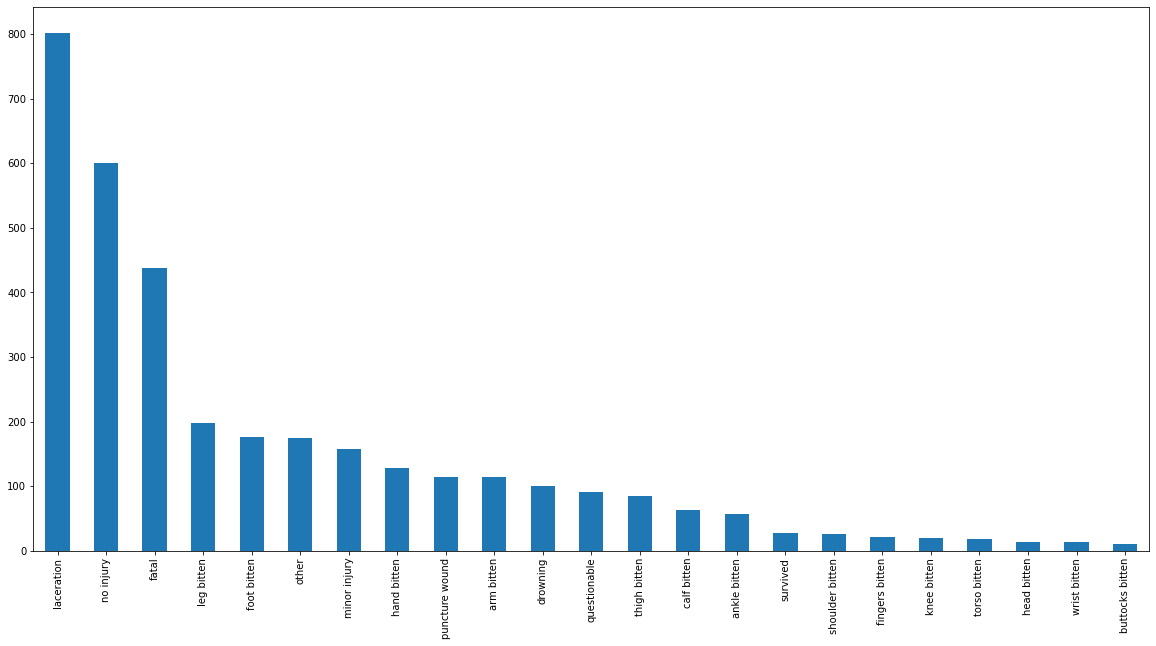

In [190]:
data.Injury.value_counts().plot.bar(figsize= (20,10))

<AxesSubplot:ylabel='Fatal (Y/N)'>

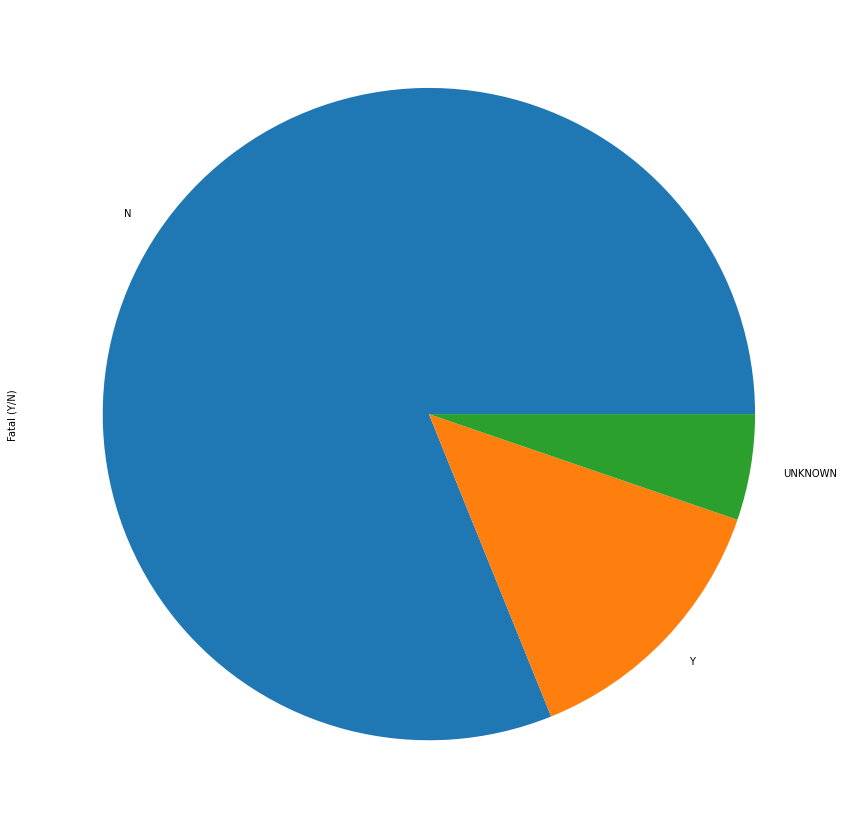

In [191]:
data["Fatal (Y/N)"].value_counts().plot.pie(figsize= (15,15))

In [198]:
data["Species "].value_counts()

shark                1143
white shark           657
questionable          426
tiger shark           274
bull shark            171
invalid               104
blacktip shark         72
bronze whaler          63
nurse shark            57
blue shark             54
mako shark             52
wobbegong shark        49
hammerhead shark       47
raggedtooth shark      43
grey nurse shark       38
lemon shark            34
zambesi shark          29
sand shark             24
spinner shark          20
sevengill shark        14
dusky shark            12
dogfish shark          10
copper shark            8
galapagos shark         7
basking shark           7
porbeagle shark         6
angel shark             5
silky shark             4
gill shark              4
carpet shark            3
goblin shark            2
salmon shark            2
leopard shark           2
silvertip shark         2
whale shark             2
Name: Species , dtype: int64

<AxesSubplot:>

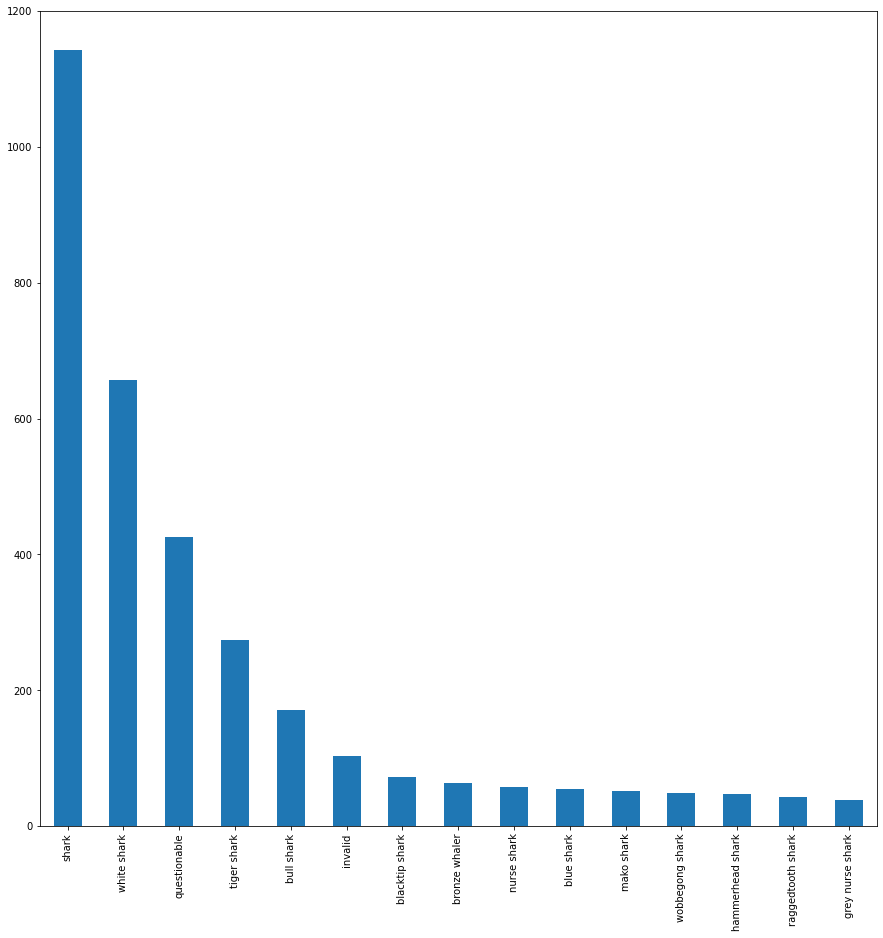

In [201]:
data["Species "].value_counts().head(15).plot.bar(figsize= (15,15))

<AxesSubplot:ylabel='Type'>

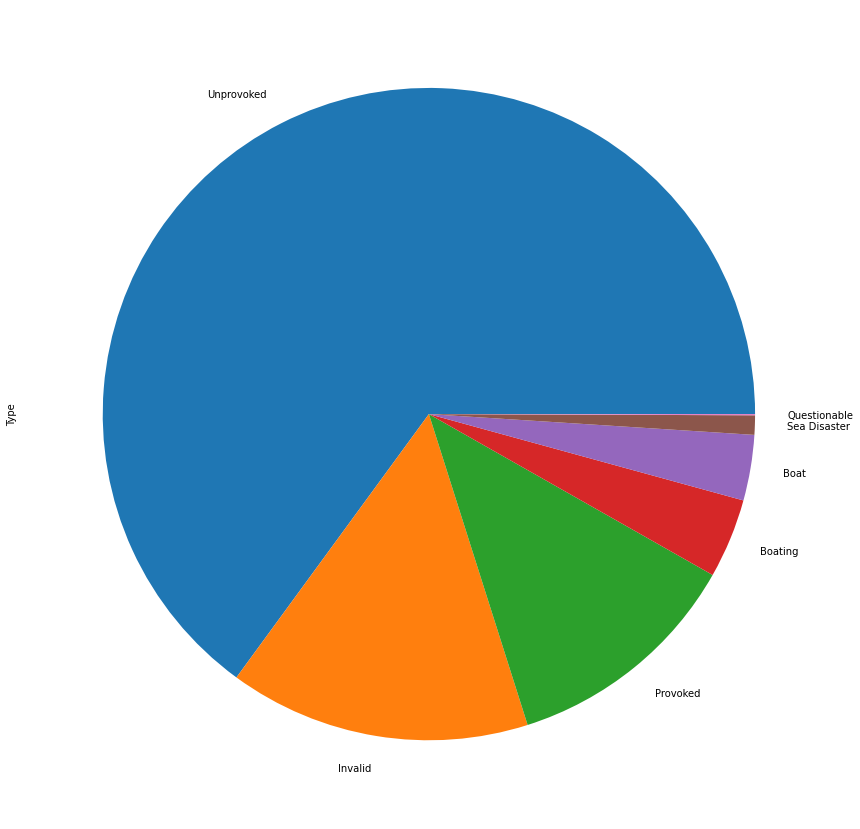

In [203]:
data["Type"].value_counts().plot.pie(figsize= (15,15))

In [213]:
for i in list(data.loc[(data["Type"] == "Boat")].index):
    data.loc[i,"Type"] = "Boating"

#consolidate boat and boating for a better graph

In [215]:
for i in list(data.loc[(data["Type"] == "Questionable")].index):
    data.loc[i,"Type"] = "Invalid"

#transformed questionable into invalids    

In [216]:
data["Type"].value_counts()

Unprovoked      2239
Invalid          517
Provoked         410
Boating          248
Sea Disaster      33
Name: Type, dtype: int64

<AxesSubplot:ylabel='Type'>

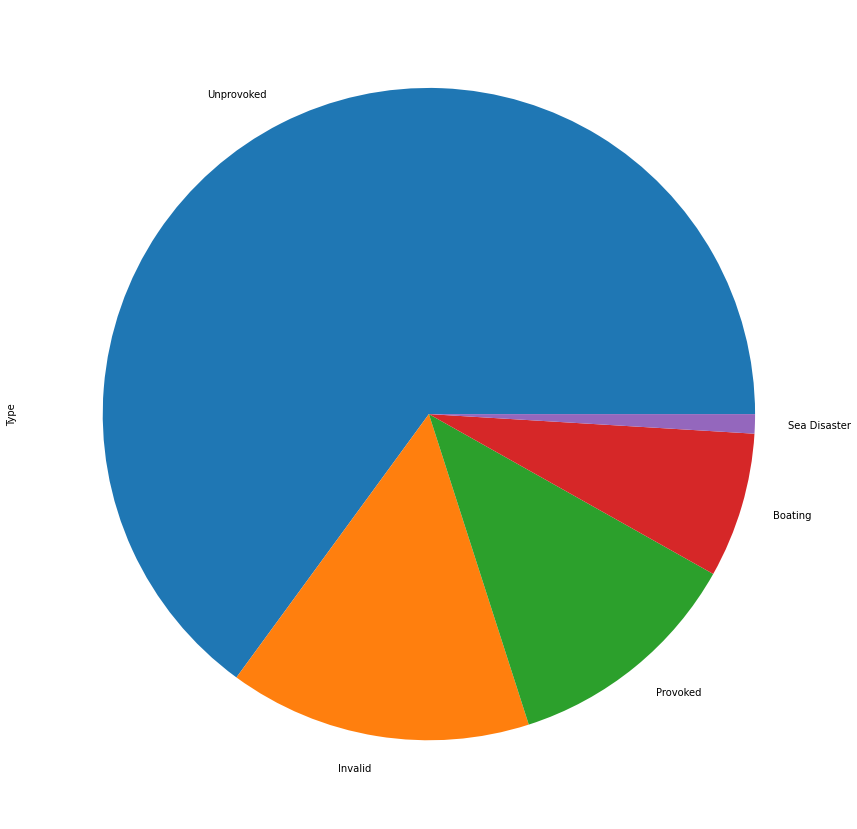

In [217]:
data["Type"].value_counts().plot.pie(figsize= (15,15))